In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
"""  Bank’s loan applicants synthetic dataset build a ML model that predicts whether an applicant would default or pay back the loan."""
"""
Data Description:

This dataset  is loan data. When a customer applies for a loan, banks and other credit providers use models to determine 
whether to grant the loan based on the likelihood of the loan being repaid. You must implement a model 
that predicts loan repayment or default based on the data provided.

The dataset consists of synthetic data that is designed to exhibit similar characteristics to genuine loan data.
Explore the dataset, do the necessary data analysis, and implement a ML model to determine the best way to predict 
whether a loan applicant will fully repay or default on a loan.
"""

"""
Data Columns:

The dataset consists of the following fields:

• Loan ID: A unique Identifier for the loan information.

• Customer ID: A unique identifier for the customer. Customers may have more than one loan.

• Loan Status: A categorical variable indicating if the loan was paid back or defaulted. – Target variable

• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

• Term: A categorical variable indicating if it is a short term or long term loan.

• Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

• Years in current job: A categorical variable indicating how many years the customer has been in their current job.

• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". 
   If the value is OWN, then the customer is a home owner with no mortgage

• Annual Income: The customer's annual income

• Purpose: A description of the purpose of the loan.

• Monthly Debt: The customer's monthly payment for their existing loans

• Years of Credit History: The years since the first entry in the customer’s credit history • 
   Months since last delinquent: Months since the last loan delinquent payment

• Number of Open Accounts: The total number of open credit cards

• Number of Credit Problems: The number of credit problems in the customer records.

• Current Credit Balance: The current total debt for the customer

• Maximum Open Credit: The maximum credit limit for all credit sources.

• Bankruptcies: The number of bankruptcies

• Tax Liens: The number of tax liens.
"""

def plot_cols(df, res_cols, cols, n_r, style='-', figname=None, figsize=None):
    n_c = int(np.ceil(len(cols) / n_r))
    fig, axes = plt.subplots(n_r, n_c, figsize=figsize)
    fig.suptitle(figname)
    for i, k in enumerate(cols):
        ax = axes[i % n_r][i // n_r]
        df[k].plot(ax=ax, style=style)
        df[res_cols].plot(ax=ax, secondary_y=True, style='.')
        ax.set_title(k, fontsize=8)
        ax.set_xticks([])

    return fig, axes


df = pd.read_csv('Loan Granting Binary Classification.csv', thousands=',')
df = df.dropna()

In [31]:
print(df.head(3))

                                Loan ID                           Customer ID  \
0  6cf51492-02a2-423e-b93d-676f05b9ad53  7c202b37-2add-44e8-9aea-d5b119aea935   
2  9b5e32b3-8d76-4801-afc8-d729d5a2e6b9  0a62fc41-16c8-40b5-92ff-9e4b763ce714   
4  1450910f-9495-4fc9-afaf-9bdf4b9821df  70c26012-bba5-42c0-8dcb-75295ada31bb   

   Loan Status  Current Loan Amount        Term  Credit Score  \
0  Charged Off                12232  Short Term        7280.0   
2  Charged Off                16117  Short Term        7240.0   
4  Charged Off                 9789   Long Term        6860.0   

  Years in current job Home Ownership  Annual Income             Purpose  \
0             < 1 year           Rent        46643.0  Debt Consolidation   
2              9 years  Home Mortgage        60438.0   Home Improvements   
4            10+ years  Home Mortgage        47003.0   Home Improvements   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0        777.39                    

In [32]:
print(df.describe())

       Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
count         4.043100e+04  40431.000000   4.043100e+04  40431.000000   
mean          1.346746e+07   1054.801415   7.704828e+04   1013.846042   
std           3.411977e+07   1436.660451   4.921253e+04    636.626764   
min           9.750000e+02    585.000000   5.855000e+03      0.000000   
25%           8.675000e+03    702.000000   4.895500e+04    585.455000   
50%           1.476600e+04    721.000000   6.633300e+04    899.870000   
75%           2.463900e+04    738.000000   9.182700e+04   1303.480000   
max           1.000000e+08   7510.000000   1.623105e+06  12055.680000   

       Years of Credit History  Months since last delinquent  \
count             40431.000000                  40431.000000   
mean                 19.061483                     34.871213   
std                   6.635722                     21.899918   
min                   3.800000                      0.000000   
25%                  1

In [33]:
print(df.nunique())

Loan ID                         31926
Customer ID                     31926
Loan Status                         2
Current Loan Amount             14541
Term                                2
Credit Score                      319
Years in current job               11
Home Ownership                      4
Annual Income                   21868
Purpose                            16
Monthly Debt                    29143
Years of Credit History           456
Months since last delinquent      109
Number of Open Accounts            46
Number of Credit Problems          11
Current Credit Balance          19367
Maximum Open Credit             23456
Bankruptcies                        8
Tax Liens                          10
dtype: int64


In [34]:
print(df.dtypes)

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [35]:
assert not df.isnull().values.any()

In [36]:
res_cols = ['Loan Status']  # response output cols
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
num_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
            'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems',
            'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
input_cols = cat_cols + num_cols

assert df['Loan ID'].nunique() == df['Customer ID'].nunique()
print(df.shape[0])

40431


In [37]:
print('-' * 20)
print('categorical var')
print('-' * 20)
for col in cat_cols:
    print(col)
print('-' * 20)

print('-' * 20)
print('numerical var')
print('-' * 20)
for col in num_cols:
    print(col)
print('-' * 20)

--------------------
categorical var
--------------------
Term
Years in current job
Home Ownership
Purpose
--------------------
--------------------
numerical var
--------------------
Current Loan Amount
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens
--------------------


In [39]:
##################################################################
# Categorical Label encoding
##################################################################
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
trfm_dict = dict()
for col in cat_cols + res_cols:
    print(col)
    le = LabelEncoder()
    x = df[col].to_numpy().astype('str')
    x = le.fit_transform(x)
    df[col] = x
    trfm_dict[col] = le

Term
Years in current job
Home Ownership
Purpose
Loan Status


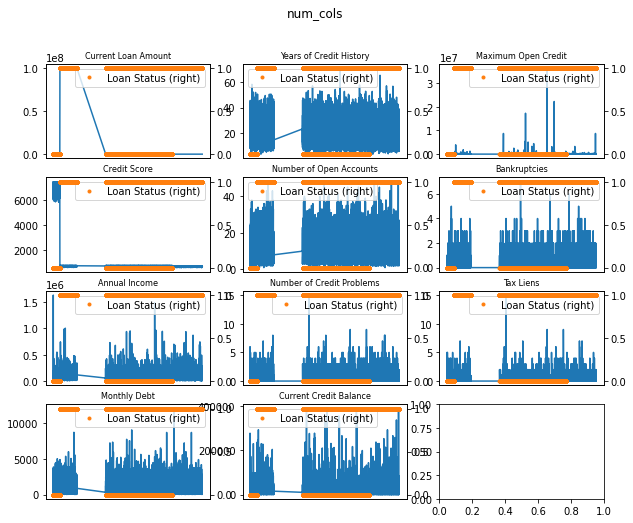

In [40]:
fig, axes = plot_cols(df, res_cols, num_cols, 4, figname='num_cols', figsize=(10, 8))

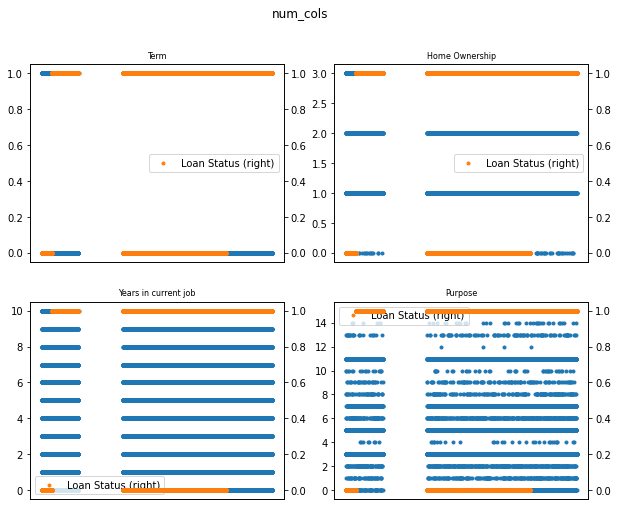

In [41]:
fig, axes = plot_cols(df, res_cols, cat_cols, 2, style='.', figname='num_cols', figsize=(10, 8))

In [42]:
##################################################################
# Numpy data array generation
##################################################################
# input numerical x
x_num = df[num_cols].to_numpy()
# input categorical x
x_cat = df[cat_cols].to_numpy()
# output response y
# swap label 1 and 0 , now 1 indicate a default event
y = df[res_cols].to_numpy()
y = np.abs(1 - y)

assert x_num.shape[0] == x_cat.shape[0] and y.shape[0] == x_cat.shape[0]
default_rate = y.sum() / len(y)
num_loan_app = df['Loan ID'].nunique()
num_cstm_app = df['Customer ID'].nunique()
num_cases = df.shape[0]
print('=' * 100)
print(f'default_rate = {100 * default_rate:.2f}% out of num_cases = {num_cases}')
print(f'num_loan_app = {num_loan_app}, num_cstm_app = {num_cstm_app}')
print('=' * 100)
##################################################################

default_rate = 20.47% out of num_cases = 40431
num_loan_app = 31926, num_cstm_app = 31926


In [43]:
##################################################################
# Train/Validation/Test data generation
##################################################################
# [x_num, x_cat, y]
# split data into train and test data
train_test_split = 0.1
from sklearn.model_selection import train_test_split

x_num_idx = x_num.shape[1]
X = np.hstack([x_num, x_cat])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [44]:
##################################################################
# Model Build
##################################################################
# Start to build model from here
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from preprocessor import Preprocessor
from sklearn.utils import Bunch

preproc_kwargs = Bunch(x_num_idx=x_num_idx, use_feature_sel=True,
                       use_cat=True, use_hot_enc=True,
                       var_threshold=1.e-3, kbest_p_val_threshold=1.e-3)
preproc = Preprocessor(**preproc_kwargs)

preproc.fit(X_train, y_train)
print(X_train.shape)
X_train = preproc.transform(X_train)
print(X_train.shape)

(36387, 15)
(36387, 38)


In [46]:
##################################################################
# KNN model fit
##################################################################
print('*'*50)
print('KNN')
print('*'*50)
knn_kwargs = Bunch(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=50, n_jobs=-1)
knn = KNN(**knn_kwargs)
knn.fit(X_train, y_train.flatten())

**************************************************
KNN
**************************************************


KNeighborsClassifier(leaf_size=50, n_jobs=-1, n_neighbors=10)

In [47]:
##################################################################
# KNN model Evaluation
##################################################################
from eval import evaluate

acc, prec, rec, conf_mat = evaluate(preproc, knn, X_test, y_test)

------------------------------
accuracy :0.836, precision:0.893, recall: 0.253
confusion matrix
------------------------------
[[3163   26]
 [ 639  216]]
------------------------------


In [48]:
##################################################################
# DecisionTreeClassifier
##################################################################
from sklearn.tree import DecisionTreeClassifier
print('*'*50)
print('DecisionTreeClassifier')
print('*'*50)

dt_kwargs = Bunch(criterion='gini', splitter='best')
dt = DecisionTreeClassifier(**dt_kwargs)
dt.fit(X_train, y_train.flatten())
acc, prec, rec, conf_mat = evaluate(preproc, dt, X_test, y_test)

**************************************************
DecisionTreeClassifier
**************************************************
------------------------------
accuracy :0.798, precision:0.525, recall: 0.460
confusion matrix
------------------------------
[[2833  356]
 [ 462  393]]
------------------------------


In [49]:
##################################################################
# Logistic Regression Model
##################################################################
from sklearn.linear_model import LogisticRegression
print('*'*50)
print('Logistic Regression Model')
print('*'*50)

logi_kwargs = Bunch(penalty='l1', solver='liblinear')
logi = LogisticRegression(**logi_kwargs)
logi.fit(X_train, y_train.flatten())
acc, prec, rec, conf_mat = evaluate(preproc, logi, X_test, y_test)

**************************************************
Logistic Regression Model
**************************************************
------------------------------
accuracy :0.841, precision:0.995, recall: 0.248
confusion matrix
------------------------------
[[3188    1]
 [ 643  212]]
------------------------------


In [50]:
##################################################################
# RandomForestClassifier Model
##################################################################
from sklearn.ensemble import RandomForestClassifier
print('*'*50)
print('RandomForestClassifier')
print('*'*50)

rforest_kwargs = Bunch(n_estimators=200, criterion='entropy', max_depth=50, n_jobs=-1)
rforest = RandomForestClassifier(**rforest_kwargs)
rforest.fit(X_train, y_train.flatten())
acc, prec, rec, conf_mat = evaluate(preproc, rforest, X_test, y_test)

**************************************************
RandomForestClassifier
**************************************************
------------------------------
accuracy :0.841, precision:0.945, recall: 0.262
confusion matrix
------------------------------
[[3176   13]
 [ 631  224]]
------------------------------


In [51]:
##################################################################
# Ensemble Model
##################################################################
from ensemble import Ensemble
print('*'*50)
print('Ensemble')
print('*'*50)

ens_clf = Ensemble(prerpoc_kwargs=preproc_kwargs,
                   knn_kwargs=knn_kwargs,
                   dt_kwargs=dt_kwargs,
                   logi_kwargs=logi_kwargs,
                   rforest_kwargs=rforest_kwargs)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

ens_clf.fit(X_train, y_train)
ens_clf.evaluate(X_test, y_test)

**************************************************
Ensemble
**************************************************
------------------------------
accuracy :0.854, precision:1.000, recall: 0.273, auc: 0.715
confusion matrix
------------------------------
[[3230    0]
 [ 592  222]]
------------------------------


In [54]:
############################################################
# TensorFlow model
############################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
print('*'*50)
print('NN Embedding Dense Model')
print('*'*50)

preproc_kwargs = Bunch(x_num_idx=x_num_idx, use_feature_sel=False,
                       use_cat=True, use_hot_enc=False,
                       var_threshold=1.e-3, kbest_p_val_threshold=1.e-3)

from emb_dense import EmbDense
emden= EmbDense(prerpoc_kwargs = preproc_kwargs,dense_cells=[16, 8, 4])

**************************************************
NN Embedding Dense Model
**************************************************


In [58]:
emden.fit(X_train,y_train, epochs = 20, validation_split =0.2)

n_cat->4, n_num->11, n_dim->15
(None, 1)
(None, 5)
(None, 2)
(None, 8)
Epoch 1/20
910/910 [==============================] - 2s 1ms/step - loss: 0.4703 - accuracy: 0.8308 - val_loss: 0.3966 - val_accuracy: 0.8423
Epoch 2/20
910/910 [==============================] - 1s 840us/step - loss: 0.3875 - accuracy: 0.8467 - val_loss: 0.3917 - val_accuracy: 0.8425
Epoch 3/20
910/910 [==============================] - 1s 850us/step - loss: 0.3775 - accuracy: 0.8528 - val_loss: 0.3902 - val_accuracy: 0.8427
Epoch 4/20
910/910 [==============================] - 1s 860us/step - loss: 0.3776 - accuracy: 0.8514 - val_loss: 0.3901 - val_accuracy: 0.8427
Epoch 5/20
910/910 [==============================] - 1s 846us/step - loss: 0.3824 - accuracy: 0.8475 - val_loss: 0.3885 - val_accuracy: 0.8427
Epoch 6/20
910/910 [==============================] - 1s 861us/step - loss: 0.3823 - accuracy: 0.8462 - val_loss: 0.3887 - val_accuracy: 0.8427
Epoch 7/20
910/910 [==============================] - 1s 858us/step

In [59]:
emden.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
model_input (InputLayer)        [(None, 15)]         0                                            
__________________________________________________________________________________________________
tf.__operators__.getitem_7 (Sli (None, 4)            0           model_input[0][0]                
__________________________________________________________________________________________________
tf.__operators__.getitem_8 (Sli (None, 1)            0           tf.__operators__.getitem_7[0][0] 
__________________________________________________________________________________________________
tf.__operators__.getitem_9 (Sli (None, 1)            0           tf.__operators__.getitem_7[0][0] 
____________________________________________________________________________________________

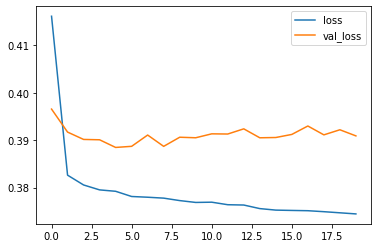

In [60]:
emden.plot_history()

In [61]:
emden.evaluate(X_test, y_test)

------------------------------
accuracy :0.850, precision:0.974, recall: 0.270, auc: 0.768
confusion matrix
------------------------------
[[3213    6]
 [ 602  223]]
------------------------------
